In [1]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
tf.random.set_seed(42)
np.random.seed(42)

In [4]:
with open('/content/drive/MyDrive/Colab Notebooks/Tesi/Iteration improvement/Results/Filter2/results_nn.json') as f:
    data = json.load(f)

print(data)

[{'R2': -0.34361440280287603, 'MAE': 0.3258422862165386, 'RMSE': 0.3777429308295121, 'Hidden Units': 64, 'Learning Rate': 0.001, 'Number of Epochs': 250, 'Number of Iterations': 20, 'training_time': 2.4342596530914307}, {'R2': -0.3330767176927487, 'MAE': 0.3377369414896277, 'RMSE': 0.37625873587300535, 'Hidden Units': 96, 'Learning Rate': 0.001, 'Number of Epochs': 250, 'Number of Iterations': 20, 'training_time': 3.2417562007904053}, {'R2': -0.4636202621387686, 'MAE': 0.35643106264711377, 'RMSE': 0.3942513842822219, 'Hidden Units': 64, 'Learning Rate': 0.001, 'Number of Epochs': 250, 'Number of Iterations': 20, 'training_time': 7.7470080852508545}, {'R2': -0.37362694959177234, 'MAE': 0.31941138621235854, 'RMSE': 0.3819384855338977, 'Hidden Units': 0, 'Learning Rate': 0.001, 'Number of Epochs': 250, 'Number of Iterations': 20, 'training_time': 6.512794017791748}, {'R2': -0.6150177445295832, 'MAE': 0.34444324778754276, 'RMSE': 0.41414046757228656, 'Hidden Units': 32, 'Learning Rate': 0.

In [5]:
# Use pd.json_normalize to convert the JSON to a DataFrame
df = pd.json_normalize(data)

# Display the DataFrame
df.head()

,R2,MAE,RMSE,Hidden Units,Learning Rate,Number of Epochs,Number of Iterations,training_time
0,-0.343614,0.325842,0.377743,64,0.001,250,20,2.434260
1,-0.333077,0.337737,0.376259,96,0.001,250,20,3.241756
2,-0.463620,0.356431,0.394251,64,0.001,250,20,7.747008
3,-0.373627,0.319411,0.381938,0,0.001,250,20,6.512794
4,-0.615018,0.344443,0.414140,32,0.001,250,20,3.473434


# Plot

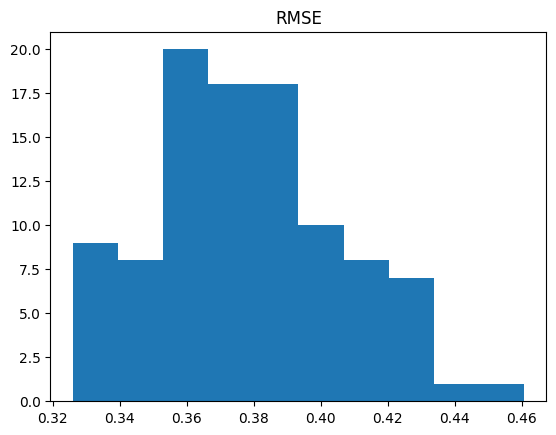

In [6]:
ax = df.hist(column='RMSE', grid=False)

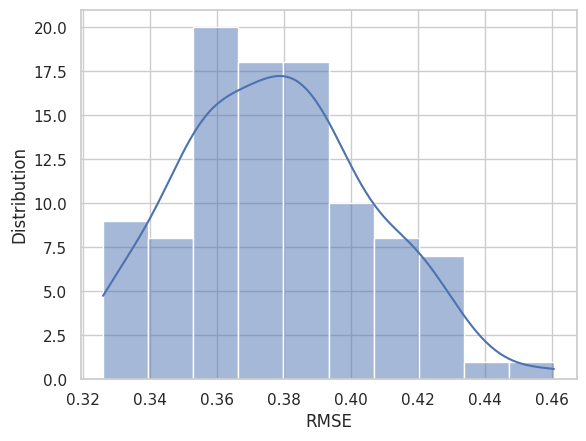

In [7]:
sns.set(style="whitegrid")

ax = sns.histplot(data=df, x='RMSE', kde=True, bins=10)

ax.set_ylabel('Distribution')

plt.show()

# Select the best data

In [8]:
mu = df['RMSE'].mean()
std = df['RMSE'].std()

print(f"mean: {round(mu, 2)}")
print(f"standard deviation: {round(std, 2)}")

mean: 0.38
standard deviation: 0.03


In [9]:
subset = df[(df["RMSE"] < mu + 2*std) & ( df["R2"] >0)]
subset.sort_values(by=['R2'], inplace=True, ascending=False)

subset = subset.iloc[:5]

subset

<ipython-input-9-402a4b7284b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.sort_values(by=['R2'], inplace=True, ascending=False)


,R2,MAE,RMSE,Hidden Units,Learning Rate,Number of Epochs,Number of Iterations,training_time


# 3D plot

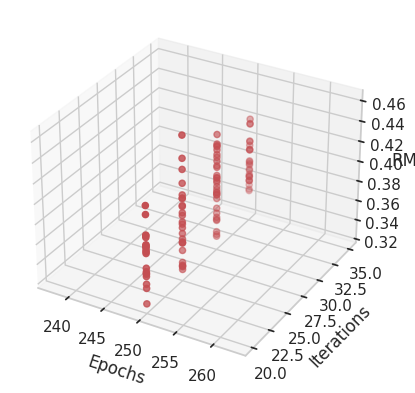

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df["Number of Epochs"],df["Number of Iterations"], df["RMSE"], c='r', marker='o')

# Set labels
ax.set_xlabel('Epochs')
ax.set_ylabel('Iterations')
ax.set_zlabel('RMSE')

# Show the plot
plt.show()